In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from scipy.stats import skew,kurtosis, probplot
from statsmodels.formula.api import ols  
import statsmodels.api as sm  
import probscale

# a) Descriptive Analysis

Read the dataset from given csv file

In [44]:
path = "ingredient.csv"
data = pd.read_csv(path)

Display the first 5 rows in the dataset

In [45]:
data.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


Display the total number of columns and rows in the dataset

In [46]:
data.shape

(214, 9)

Detect the nulls and features' types

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


There is no null exist in the dataset and each value in each column is numerical (float64).

## Data Variable
- Quantitave (Continuous Variable)
    - Interval
        - a
        - b
        - c
        - d
        - e
        - f
        - g
        - h
        - i

In [48]:
data.nunique()

a    178
b    142
c     94
d    118
e    133
f     65
g    143
h     34
i     32
dtype: int64

Each column has varied / distinct values

Display the mean, standard deviation, minimum, first quartile, second quartile and third quartile, and maximum value of the column

In [49]:
data.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [50]:
skew(data, axis = 0)

array([ 1.61401505,  0.45099172, -1.14446485,  0.90091788, -0.72531727,
        6.50563583,  2.03267738,  3.39243089,  1.74200676])

- Columns a, b, d, f, g, h, i are left skewed
- Columns c, e  are right skewed

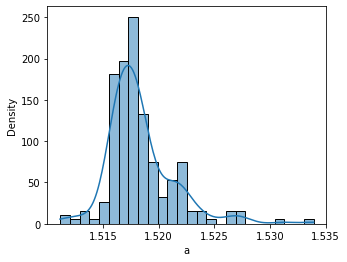

In [51]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sb.histplot(data['a'], kde=True, stat="density")
plt.show()

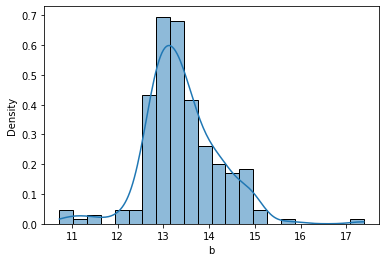

In [52]:
bx = sb.histplot(data['b'], kde=True, stat="density")

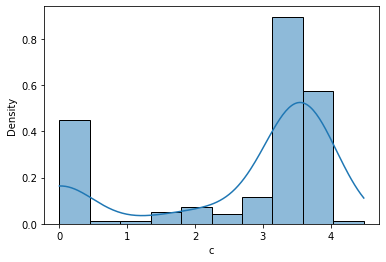

In [53]:
cx = sb.histplot(data['c'], kde=True, stat="density")

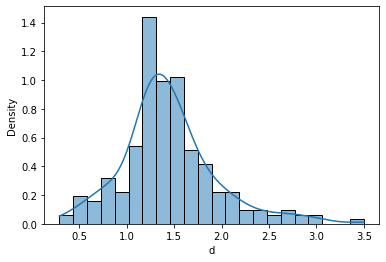

In [54]:
dx = sb.histplot(data['d'], kde=True, stat="density")

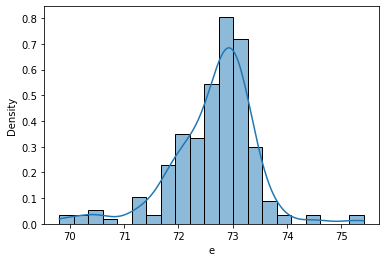

In [55]:
ex = sb.histplot(data['e'], kde=True, stat="density")

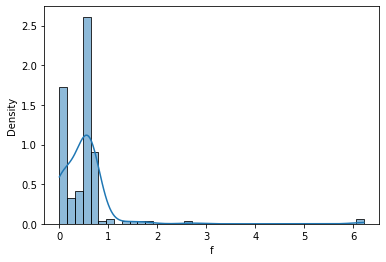

In [56]:
fx = sb.histplot(data['f'], kde=True, stat="density")

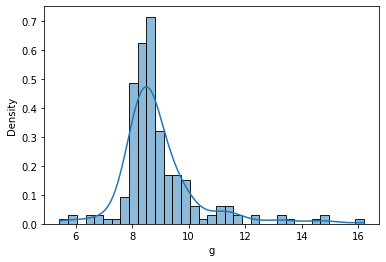

In [57]:
gx = sb.histplot(data['g'], kde=True, stat="density")

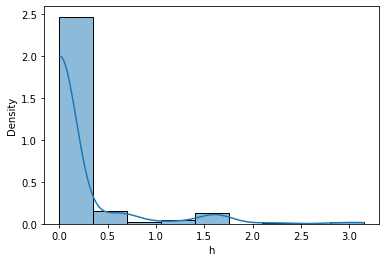

In [58]:
hx = sb.histplot(data['h'], kde=True, stat="density")

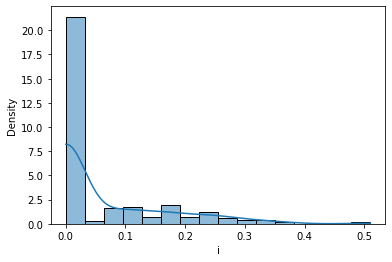

In [59]:
ix = sb.histplot(data['i'], kde=True, stat="density")

- From the graph above, we can tell that columns "a, b, d, e, f, g, h, i" are parameters data, while column "c" is non-parameter data
- Since columns "a, b, d, e, f, g, h, i" are normal but skewed due to the existence of outliers but "c" is not normal with two peak hill.
- The normal distribution in the dataset are advisable to be transformed / converted to look more like theoritically "normal" by logarithm or exponential equation.

- H0 : The effect of column "a" is independent to the other variable
- H1 : There is no interaction effect between "a" and others.

In [60]:
model = ols(
    'a ~ b + c + d + e + f + g + h + i', data = data).fit()
sm.stats.anova_lm(model, typ=2) 
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(model, typ = 2)   
print('----------------------------------------------------------------------------------------') 
print('ANOVA Table for "a" with "b, c, d, e, f, g, h, i"')  
print(aovtable)  
print()  

----------------------------------------------------------------------------------------
ANOVA Table for "a" with "b, c, d, e, f, g, h, i"
                sum_sq     df          F    PR(>F)
b         4.574068e-06    1.0   4.536899  0.034364
c         7.515654e-06    1.0   7.454582  0.006878
d         2.200281e-09    1.0   0.002182  0.962785
e         6.238561e-08    1.0   0.061879  0.803800
f         4.049714e-06    1.0   4.016807  0.046365
g         2.192379e-05    1.0  21.745638  0.000006
h         1.962916e-05    1.0  19.469652  0.000017
i         3.021286e-07    1.0   0.299674  0.584683
Residual  2.066795e-04  205.0        NaN       NaN



- The null hypothesis testing is rejected when p-value is less than or equal to 0.05
- Hence, columns "d, e, i" are independent to a. While "b, c, f, g, h" are dependent to "a"

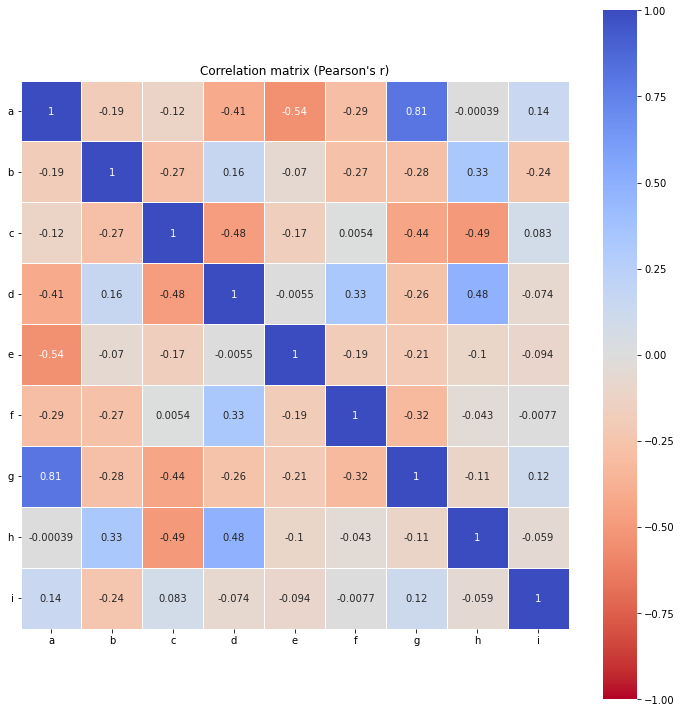

In [61]:
plt.figure(figsize = (10, 10))
ax = sb.heatmap(
    data.corr(),
    vmin=-1,
    vmax=1,
    square=True,
    linewidth=0.5,
    cmap="coolwarm_r",
    annot=True,
)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set(title="Correlation matrix (Pearson's r)")

plt.tight_layout()
plt.show()

- The correlation features between columns "a" and "g" are extremely high while "a" and "c, i" are significantly low and weak
- Hence, it is advisable that the columns "c, i" to be terminated since these columns do not contribute to our dependent variable "a"

# b) Graphical Analysis

<AxesSubplot:>

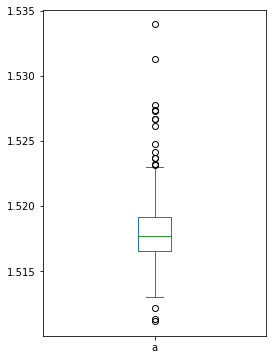

In [62]:
data["a"].plot.box(figsize=(4, 6))

Box-and-whisker plot of column "a" can be considered as perfect normal and bit left skewed . There are a lots of outliers, then remove outliers are advisable.

<AxesSubplot:>

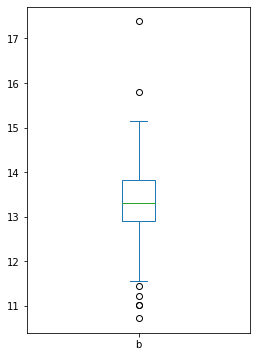

In [63]:
data["b"].plot.box(figsize=(4, 6))

Box-and-whisker plot of column "b" can be considered as perfect normal and bit left skewed . There are a lots of outliers, then remove outliers are advisable.

<AxesSubplot:>

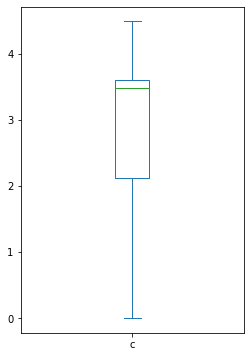

In [64]:
data["c"].plot.box(figsize=(4, 6))

Box-and-whisker plot of column "g" can be considered as normal and significantly right skewed. Data preprocessing is considerable

<AxesSubplot:>

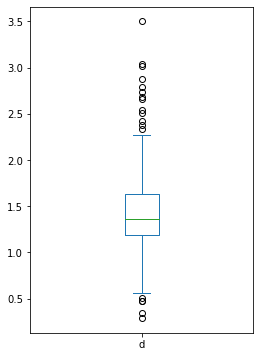

In [65]:
data["d"].plot.box(figsize=(4, 6))

Box-and-whisker plot of column "d" can be considered as normal and bit left skewed . There are a lots of outliers, then remove outliers are advisable.

<AxesSubplot:>

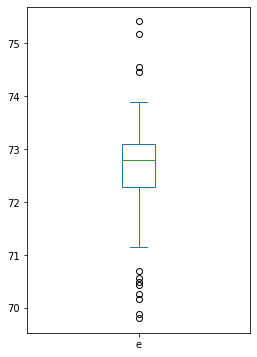

In [66]:
data["e"].plot.box(figsize=(4, 6))

Box-and-whisker plot of column "e" can be considered as normal and right skewed . There are a lots of outliers, then remove outliers are advisable.

<AxesSubplot:>

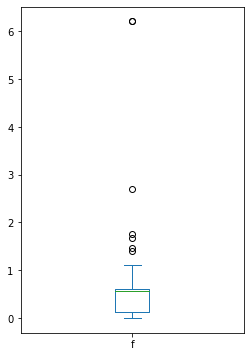

In [67]:
data["f"].plot.box(figsize=(4, 6))

Box-and-whisker plot of column "f" can be considered as normal and right skewed . There are a lots of outliers, then remove outliers are advisable.

<AxesSubplot:>

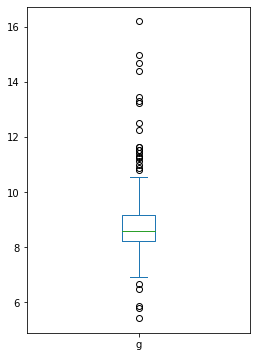

In [68]:
data["g"].plot.box(figsize=(4, 6))

Box-and-whisker plot of column "g" can be considered as normal and left skewed . There are a lots of outliers, then remove outliers are advisable.

<AxesSubplot:>

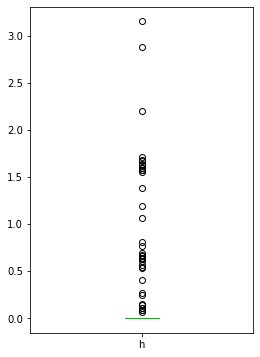

In [69]:
data["h"].plot.box(figsize=(4, 6))

Box-and-whisker plot of column "h" is not considered as normal and can't be visualized properly since there are a lots of outliers. Remove outliers are advisable.

<AxesSubplot:>

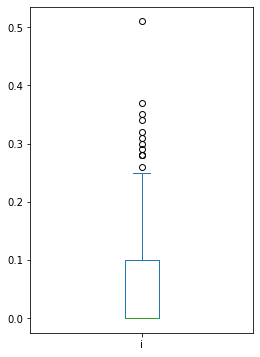

In [70]:
data["i"].plot.box(figsize=(4, 6))

Box-and-whisker plot of column "i" is not considered as normal and can't be visualized the median or mean properly since there are a lots of outliers. Remove outliers are advisable.

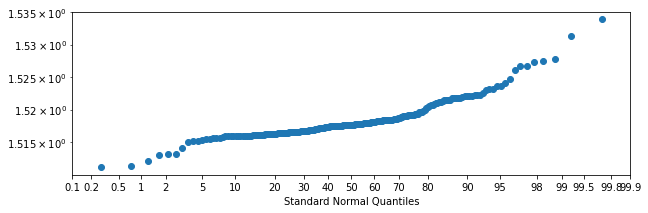

In [82]:
fig, ax = plt.subplots(figsize=(10, 3))
fig = probscale.probplot(data["a"], ax=ax, plottype='prob', datascale='log',
                         problabel='Standard Normal Quantiles')


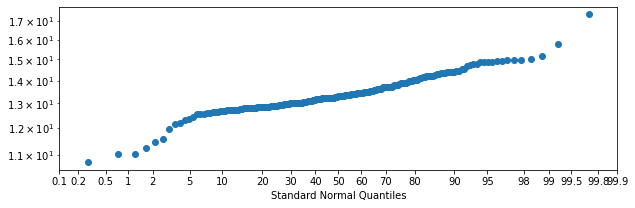

In [83]:
fig, ax = plt.subplots(figsize=(10, 3))
fig = probscale.probplot(data["b"], ax=ax, plottype='prob', datascale='log',
                         problabel='Standard Normal Quantiles')


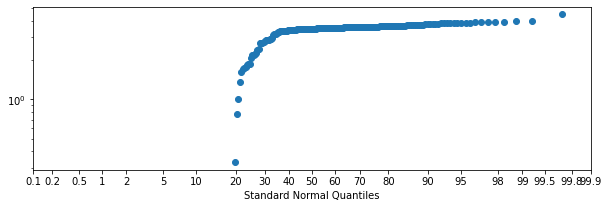

In [84]:
fig, ax = plt.subplots(figsize=(10, 3))
fig = probscale.probplot(data["c"], ax=ax, plottype='prob', datascale='log',
                         problabel='Standard Normal Quantiles')


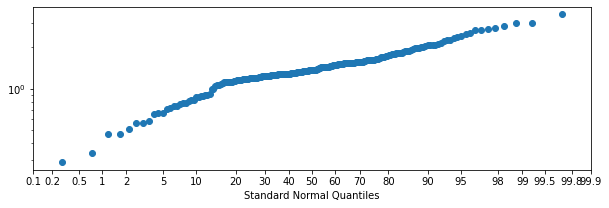

In [85]:
fig, ax = plt.subplots(figsize=(10, 3))
fig = probscale.probplot(data["d"], ax=ax, plottype='prob', datascale='log',
                         problabel='Standard Normal Quantiles')


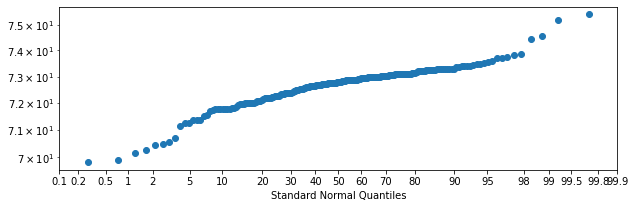

In [86]:
fig, ax = plt.subplots(figsize=(10, 3))
fig = probscale.probplot(data["e"], ax=ax, plottype='prob', datascale='log',
                         problabel='Standard Normal Quantiles')


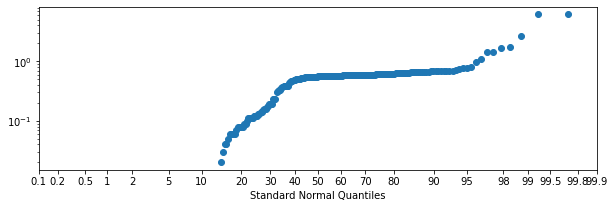

In [87]:
fig, ax = plt.subplots(figsize=(10, 3))
fig = probscale.probplot(data["f"], ax=ax, plottype='prob', datascale='log',
                         problabel='Standard Normal Quantiles')


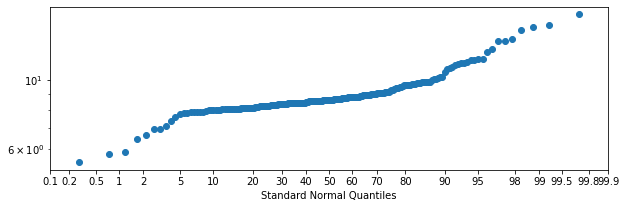

In [88]:
fig, ax = plt.subplots(figsize=(10, 3))
fig = probscale.probplot(data["g"], ax=ax, plottype='prob', datascale='log',
                         problabel='Standard Normal Quantiles')


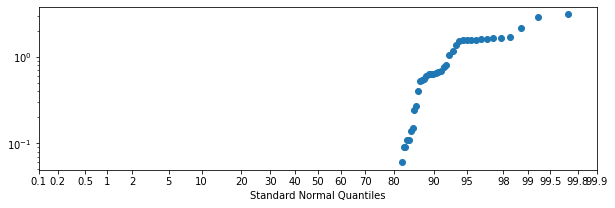

In [89]:
fig, ax = plt.subplots(figsize=(10, 3))
fig = probscale.probplot(data["h"], ax=ax, plottype='prob', datascale='log',
                         problabel='Standard Normal Quantiles')


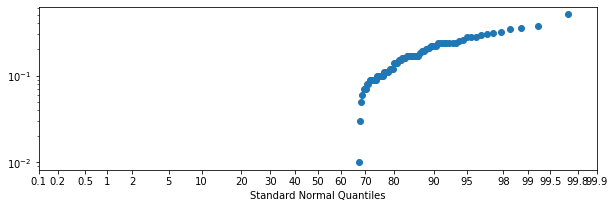

In [90]:
fig, ax = plt.subplots(figsize=(10, 3))
fig = probscale.probplot(data["i"], ax=ax, plottype='prob', datascale='log',
                         problabel='Standard Normal Quantiles')


- Normal probability plot for column "a, b, d, e, g" are approximately normal distributed with skewed while other columns' plot are completely not normal.

# c) Clustering Test

In [94]:
data_array = np.array(data)

In [95]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_array)

In [97]:
kmeans_kwargs = \
{
"init": "random",
"n_init": 10,
 "max_iter": 300,
"random_state": 42,
}


sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

c:\Users\QQ\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


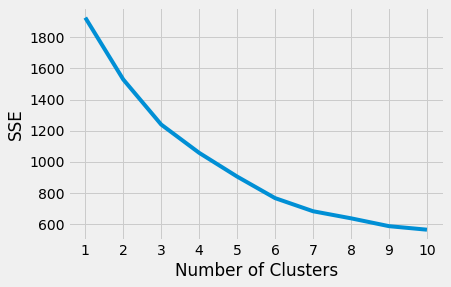

In [98]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [99]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

In [100]:
kl.elbow

5

There exists 5 distinctive number of formulations present in the given dataset